# 🎗️ Deteksi Kanker Menggunakan Machine Learning

📌 Pendahuluan
Kanker merupakan salah satu penyakit dengan tingkat mortalitas tinggi di dunia. Deteksi dini sangat penting untuk meningkatkan peluang keberhasilan pengobatan. Dengan kemajuan teknologi, Machine Learning 🤖 dapat digunakan untuk membantu dalam menganalisis data pasien dan memberikan prediksi berbasis pola yang ditemukan dalam dataset medis.

Pada proyek ini, kami akan melakukan Eksplorasi Data (EDA) dan mengembangkan model Machine Learning untuk memprediksi kemungkinan diagnosis kanker berdasarkan berbagai indikator kesehatan pasien.

📌 Tentang Dataset
Dataset yang digunakan dalam penelitian ini berisi informasi mengenai pasien yang telah menjalani pemeriksaan medis terkait kanker. Terdapat 1.500 entri, dengan setiap entri mencerminkan data seorang pasien. Dataset ini memiliki berbagai fitur yang relevan dengan deteksi kanker, memungkinkan analisis mendalam untuk menemukan hubungan antara faktor risiko dan kemungkinan diagnosis.

🔍 Fitur dalam Dataset
- Usia (tahun) – Rentang usia pasien yang dianalisis.
- Indeks Massa Tubuh (BMI, kg/m²) – Indikator proporsi berat badan terhadap tinggi badan pasien.
- Tingkat Hemoglobin (g/dL) – Salah satu parameter penting dalam darah yang dapat menunjukkan kondisi kesehatan pasien.
- Jumlah Sel Darah Putih (10³/µL) – Parameter yang sering digunakan untuk mendeteksi kemungkinan adanya infeksi atau gangguan imun.
- Ukuran Tumor (cm) – Parameter yang menunjukkan ukuran kanker yang terdeteksi selama pemeriksaan medis.

📌 Variabel Target
Diagnosis Kanker (biner) – 0 menunjukkan pasien tidak terdiagnosis kanker, sementara 1 menandakan bahwa pasien terkonfirmasi memiliki kanker berdasarkan hasil pemeriksaan.

# Import Library


In [ ]:
import numpy as np  # Untuk operasi aljabar linear dan komputasi numerik
import pandas as pd  # Untuk pemrosesan data dan membaca file CSV
import matplotlib.pyplot as plt  # Untuk visualisasi data dasar
import seaborn as sns  # Untuk visualisasi data yang lebih kompleks dan menarik

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

**Membaca Dataset**

In [16]:
df = pd.read_csv(r'C:\Users\asus\Downloads\MachineLearning\The_Cancer_data_1500_V2.csv')

df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [17]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


**Memeriksa Tipe Data Variabel**

In [19]:
df.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

**Mengecek Nilai yang Hilang (missing values)**

In [20]:
df.isna().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

# Metodologi

**Eksplorasi Data (EDA) 📊**
- Menganalisis distribusi data menggunakan statistik deskriptif.
- Memvisualisasikan hubungan antar variabel menggunakan grafik.
- Mendeteksi dan menangani data yang hilang atau anomali.

**Rekayasa Fitur 🔎**
- Mengidentifikasi faktor paling berpengaruh dalam diagnosis kanker.
- Normalisasi dan pemrosesan data agar sesuai untuk model Machine Learning.

**Pengembangan Model Machine Learning 🤖**
- Menggunakan berbagai algoritma klasifikasi, seperti Random Forest, Logistic Regression, dan Support Vector Machine (SVM).
- Evaluasi model menggunakan metrik akurasi, presisi, recall, dan F1-score untuk mendapatkan performa terbaik.


# Cleansing Data – Menghapus data kosong atau duplikat.# DATA CLEANING

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 0, 'BMI')

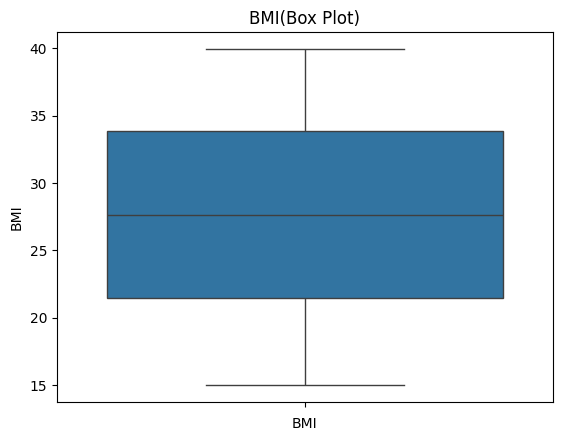

In [23]:
sns.boxplot(data=df['BMI'])
plt.title('BMI(Box Plot)')
plt.xlabel('BMI')

Text(0.5, 0, 'AlcoholIntake')

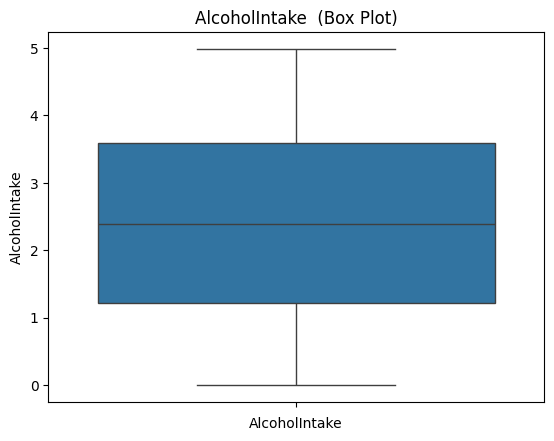

In [24]:
sns.boxplot(data=df['AlcoholIntake'])
plt.title('AlcoholIntake  (Box Plot)')
plt.xlabel('AlcoholIntake')

Text(0.5, 0, 'BMI')

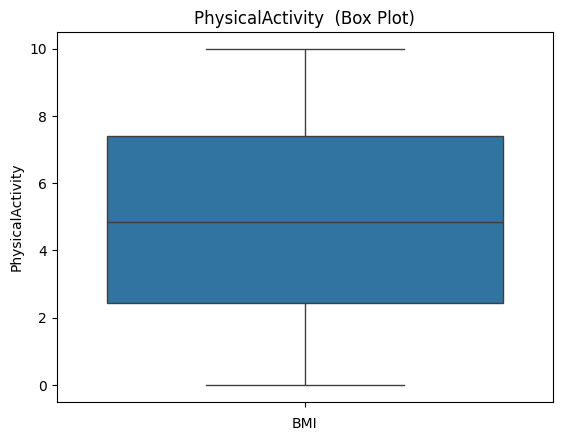

In [25]:
sns.boxplot(data=df['PhysicalActivity'])
plt.title('PhysicalActivity  (Box Plot)')
plt.xlabel('BMI')

In [26]:
cancerous_patients=df[df['Diagnosis']==1]
cancerous_males = df[(df['Diagnosis'] == 1) & (df['Gender'] == 'Male')]

# Filter cancerous female patients
cancerous_females = df[(df['Diagnosis'] == 1) & (df['Gender'] == 'Female')]

non_cancerous_patients=df[df['Diagnosis']==0]

# Data visualisasi


# Distribusi BMI pada Pasien Kanker dan Non-Kanker
Analisis ini bertujuan untuk melihat bagaimana Indeks Massa Tubuh (BMI) tersebar di antara pasien yang menderita kanker dan yang tidak. Ini membantu memahami apakah ada pola tertentu pada BMI yang berhubungan dengan kanker.

<Axes: xlabel='BMI', ylabel='Count'>

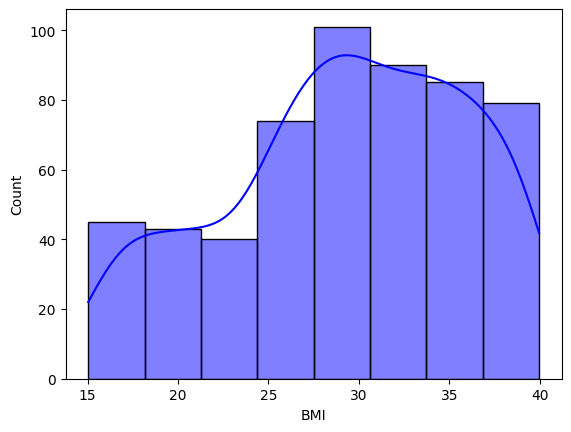

In [27]:
sns.histplot(cancerous_patients['BMI'], bins=8, kde=True, color='blue')

<Axes: xlabel='BMI', ylabel='Count'>

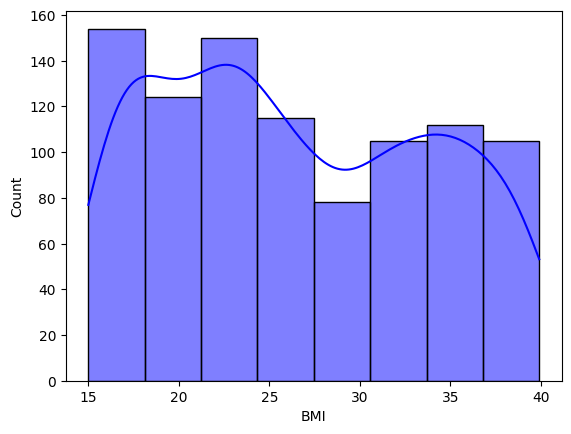

In [28]:
sns.histplot(non_cancerous_patients['BMI'], bins=8, kde=True, color='blue')

C:\Users\asus\AppData\Local\Temp\ipykernel_28616\1933384958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=df, palette='coolwarm')


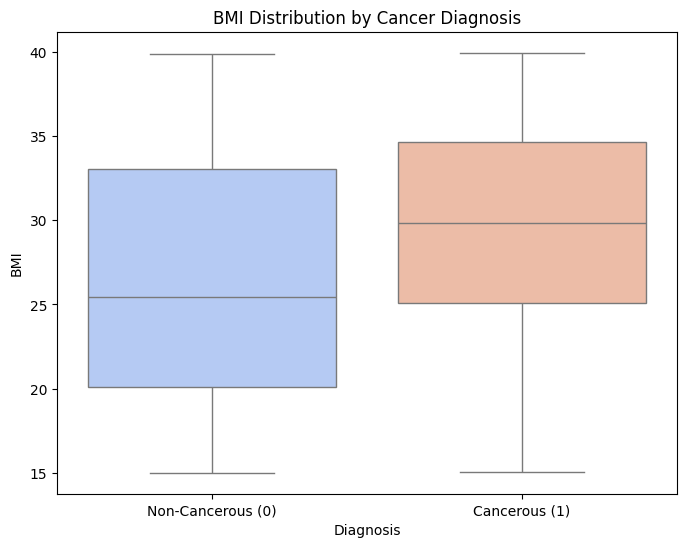

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=df, palette='coolwarm')
plt.title('BMI Distribution by Cancer Diagnosis')
plt.xticks([0, 1], ['Non-Cancerous (0)', 'Cancerous (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

<Axes: xlabel='PhysicalActivity', ylabel='Count'>

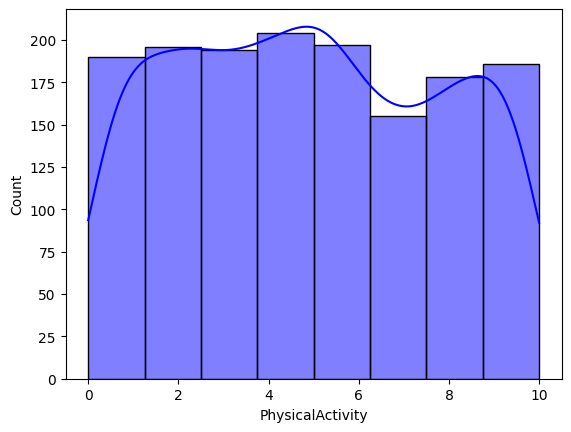

In [32]:
sns.histplot(df['PhysicalActivity'], bins=8, kde=True, color='blue')

# Histogram distribusi aktivitas fisik pada pasien kanker.

Visualisasi ini menunjukkan bagaimana tingkat aktivitas fisik tersebar di antara pasien yang menderita kanker, membantu memahami pola kebiasaan fisik mereka.

<Axes: xlabel='PhysicalActivity', ylabel='Count'>

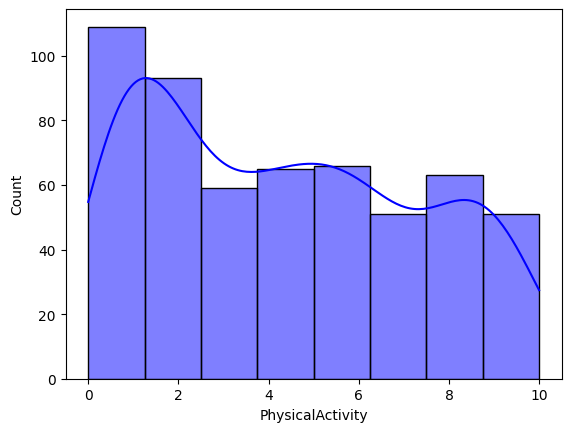

In [37]:
sns.histplot(cancerous_patients['PhysicalActivity'], bins=8, kde=True, color='blue')

<Axes: xlabel='AlcoholIntake', ylabel='Count'>

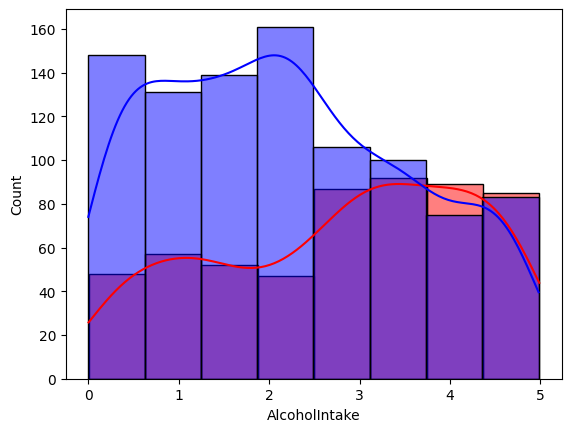

In [34]:
sns.histplot(cancerous_patients['AlcoholIntake'], bins=8, kde=True, color='red')
sns.histplot(non_cancerous_patients['AlcoholIntake'], bins=8, kde=True, color='blue')

# Boxplot konsumsi alkohol berdasarkan jenis kelamin.

Plot ini menunjukkan distribusi konsumsi alkohol antara laki-laki dan perempuan, membantu melihat perbedaan pola konsumsi di antara kedua kelompok.

**Persentase pasien kanker pada BMI rendah dan BMI tinggi.**
Analisis ini membandingkan proporsi pasien kanker berdasarkan kategori BMI rendah dan BMI tinggi, untuk melihat apakah ada hubungan antara BMI dan risiko kanker.# PERCENTAGE OF CANCEROUS PATIENTS AMONG LOW BMI AND AND HIGH BMI

C:\Users\asus\AppData\Local\Temp\ipykernel_28616\4243927657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='AlcoholIntake', data=df, palette='Set2')


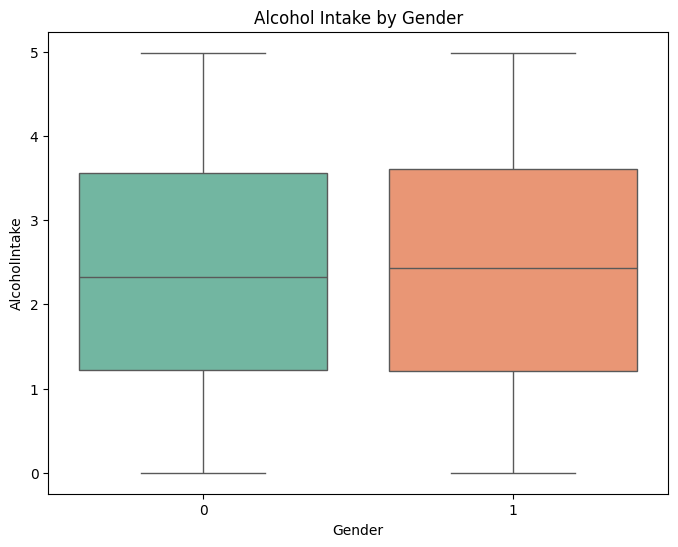

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='AlcoholIntake', data=df, palette='Set2')
plt.title('Alcohol Intake by Gender')
plt.show()

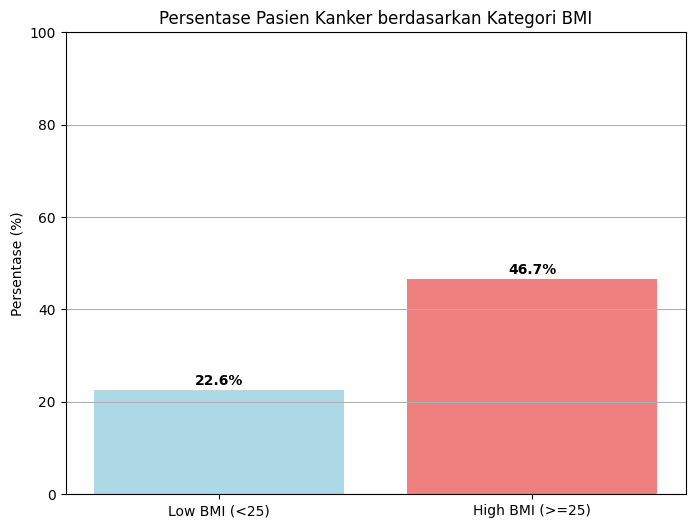

In [41]:
low_bmi_patients = df[df['BMI'] < 25]  # Memfilter pasien dengan BMI di bawah 25 (kategori BMI rendah)
high_bmi_patients = df[df['BMI'] >= 25]  # Memfilter pasien dengan BMI 25 atau lebih (kategori BMI tinggi)

# Langkah 2: Menghitung jumlah pasien kanker (Diagnosis = 1) dalam setiap kategori BMI
cancerous_low_bmi = low_bmi_patients[low_bmi_patients['Diagnosis'] == 1].shape[0]  
cancerous_high_bmi = high_bmi_patients[high_bmi_patients['Diagnosis'] == 1].shape[0]  

# Langkah 3: Menghitung total jumlah pasien dalam setiap kategori BMI
total_low_bmi = low_bmi_patients.shape[0]  
total_high_bmi = high_bmi_patients.shape[0]  

# Langkah 4: Menghitung persentase pasien kanker dalam setiap kategori BMI
percentage_cancerous_low_bmi = (cancerous_low_bmi / total_low_bmi) * 100 if total_low_bmi > 0 else 0  
percentage_cancerous_high_bmi = (cancerous_high_bmi / total_high_bmi) * 100 if total_high_bmi > 0 else 0  

# Langkah 5: Mempersiapkan data untuk diagram batang
labels = ['Low BMI (<25)', 'High BMI (>=25)']  # Label kategori BMI
percentages = [percentage_cancerous_low_bmi, percentage_cancerous_high_bmi]  # Persentase pasien kanker di setiap kategori

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['lightblue', 'lightcoral'])

# Menambahkan judul dan label sumbu
plt.title('Persentase Pasien Kanker berdasarkan Kategori BMI')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)  # Mengatur batas sumbu y hingga 100%
plt.grid(axis='y')  # Menambahkan garis bantu horizontal untuk meningkatkan keterbacaan

# Menampilkan nilai persentase di atas batang
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_28616\495758761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=cancerous_patients, palette='coolwarm')


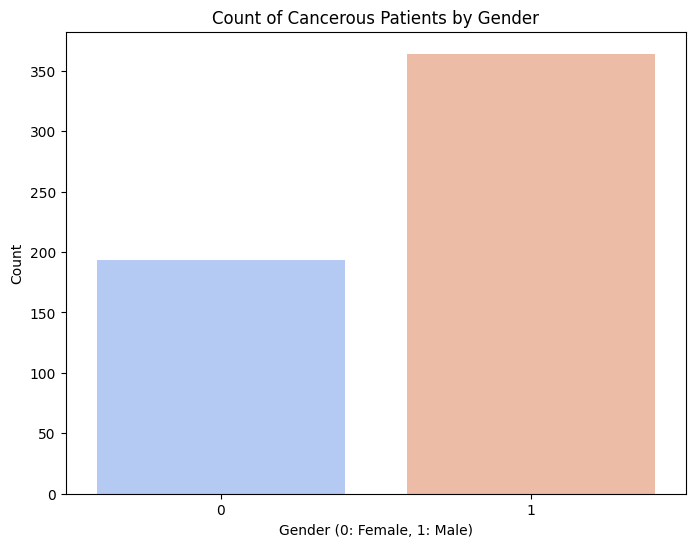

In [43]:
cancerous_patients = df[df['Diagnosis'] == 1]

# Membuat Grafik Batang (Count Plot) untuk Jenis Kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=cancerous_patients, palette='coolwarm')

# Menambahkan Judul dan Label
plt.title('Count of Cancerous Patients by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

In [44]:
df['Smoking'].value_counts()

Smoking
0    1096
1     404
Name: count, dtype: int64

# Scatter plot pasien kanker berdasarkan risiko genetik

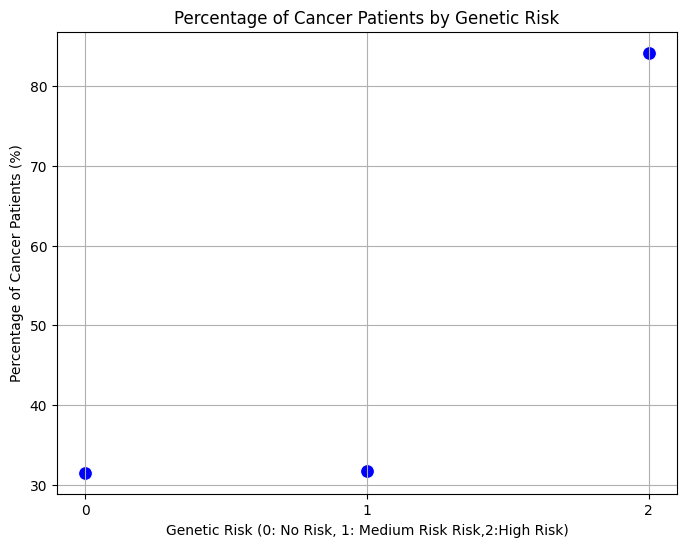

In [46]:
# Menghitung Total Data Berdasarkan Risiko Genetik
total_records_by_risk = df.groupby('GeneticRisk').size().reset_index(name='TotalRecords')
cancer_count_by_risk = df[df['Diagnosis'] == 1].groupby('GeneticRisk').size().reset_index(name='CancerCount')

# Menggabungkan Data Total Pasien dan Pasien Kanker
merged_data = pd.merge(total_records_by_risk, cancer_count_by_risk, on='GeneticRisk', how='left').fillna(0)

# Menghitung Persentase Pasien Kanker
merged_data['CancerPercentage'] = (merged_data['CancerCount'] / merged_data['TotalRecords']) * 100

# Membuat Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GeneticRisk', y='CancerPercentage', data=merged_data, s=100, color='blue')

# Menambahkan Judul dan Label
plt.title('Percentage of Cancer Patients by Genetic Risk')
plt.xlabel('Genetic Risk (0: No Risk, 1: Medium Risk Risk,2:High Risk)')
plt.ylabel('Percentage of Cancer Patients (%)')
plt.xticks([0, 1,2])  # Set x-ticks to match the genetic risk values
plt.grid(True)
plt.show()

# Diagram Lingkaran Pasien dengan Riwayat Kanker

Diagnosis
1    180
0     36
Name: count, dtype: int64


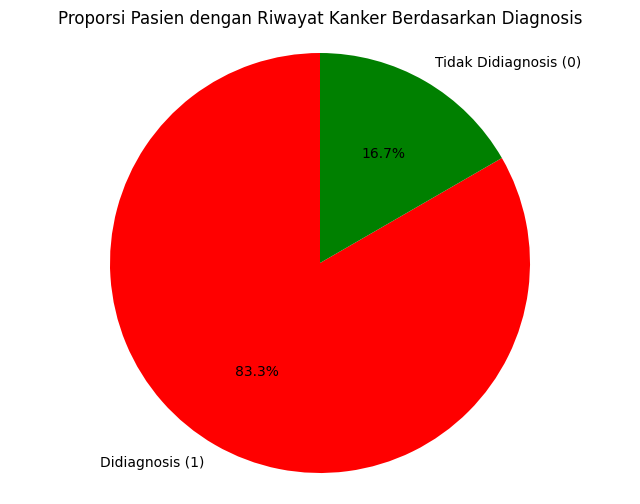

In [48]:
# Langkah 1: Memfilter pasien yang memiliki riwayat kanker
pasien_dengan_riwayat_kanker = df[df['CancerHistory'] == 1]

# Langkah 2: Menghitung jumlah pasien yang didiagnosis (Diagnosis = 1) dan tidak didiagnosis (Diagnosis = 0)
jumlah_diagnosis = pasien_dengan_riwayat_kanker['Diagnosis'].value_counts()
print(jumlah_diagnosis)

# Langkah 3: Menghitung persentase dari masing-masing kategori
persentase = (jumlah_diagnosis / jumlah_diagnosis.sum()) * 100

# Langkah 4: Membuat diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(persentase, labels=['Didiagnosis (1)', 'Tidak Didiagnosis (0)'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Proporsi Pasien dengan Riwayat Kanker Berdasarkan Diagnosis')
plt.axis('equal')  # Memastikan diagram lingkaran tetap berbentuk lingkaran
plt.show()


83,3% dari data dengan riwayat kanker didiagnosis menderita kanker.

# DIAGRAM PIE PEROKOK

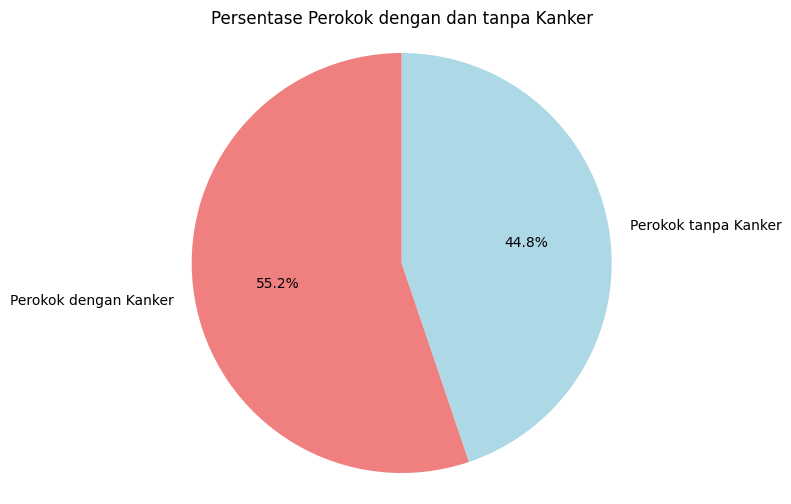

In [49]:
# Langkah 1: Memfilter data untuk mendapatkan pasien yang merokok
perokok = df[df['Smoking'] == 1]

# Langkah 2: Menghitung jumlah pasien kanker di antara perokok
pasien_kanker = perokok[perokok['Diagnosis'] == 1].shape[0]

# Langkah 3: Menghitung total jumlah perokok
total_perokok = perokok.shape[0]

# Langkah 4: Menghitung persentase perokok yang menderita kanker
if total_perokok > 0:  # Menghindari pembagian dengan nol
    persentase_dengan_kanker = (pasien_kanker / total_perokok) * 100
else:
    persentase_dengan_kanker = 0

# Langkah 5: Menyiapkan data untuk diagram pie
label = ['Perokok dengan Kanker', 'Perokok tanpa Kanker']
ukuran = [persentase_dengan_kanker, 100 - persentase_dengan_kanker]  # 100% dikurangi persentase kanker

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(ukuran, labels=label, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Persentase Perokok dengan dan tanpa Kanker')
plt.axis('equal')  # Memastikan diagram pie berbentuk lingkaran
plt.show()

55,2 persen perokok didiagnosis menderita kanker

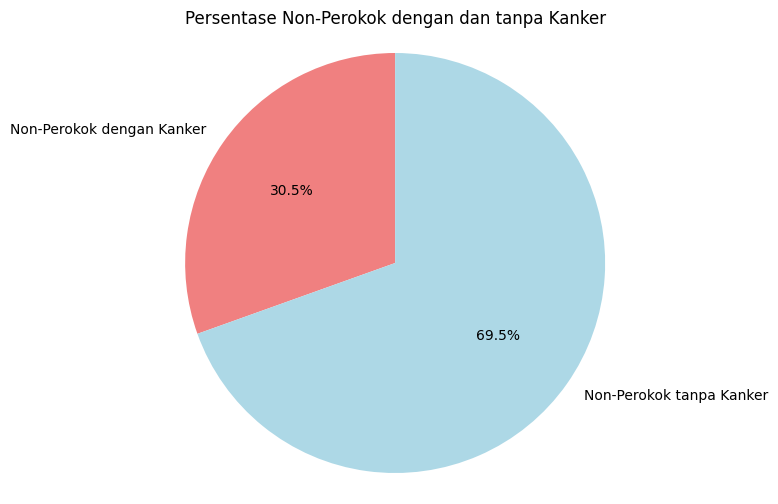

In [50]:
# DIAGRAM PIE NON-PEROKOK

# Langkah 1: Memfilter data untuk mendapatkan pasien yang bukan perokok
non_perokok = df[df['Smoking'] == 0]

# Langkah 2: Menghitung jumlah pasien kanker di antara non-perokok
pasien_kanker = non_perokok[non_perokok['Diagnosis'] == 1].shape[0]

# Langkah 3: Menghitung total jumlah non-perokok
total_non_perokok = non_perokok.shape[0]

# Langkah 4: Menghitung persentase non-perokok yang menderita kanker
if total_non_perokok > 0:  # Menghindari pembagian dengan nol
    persentase_dengan_kanker = (pasien_kanker / total_non_perokok) * 100
else:
    persentase_dengan_kanker = 0

# Langkah 5: Menyiapkan data untuk diagram pie
label = ['Non-Perokok dengan Kanker', 'Non-Perokok tanpa Kanker']
ukuran = [persentase_dengan_kanker, 100 - persentase_dengan_kanker]  # 100% dikurangi persentase kanker

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(ukuran, labels=label, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Persentase Non-Perokok dengan dan tanpa Kanker')
plt.axis('equal')  # Memastikan diagram pie berbentuk lingkaran
plt.show()


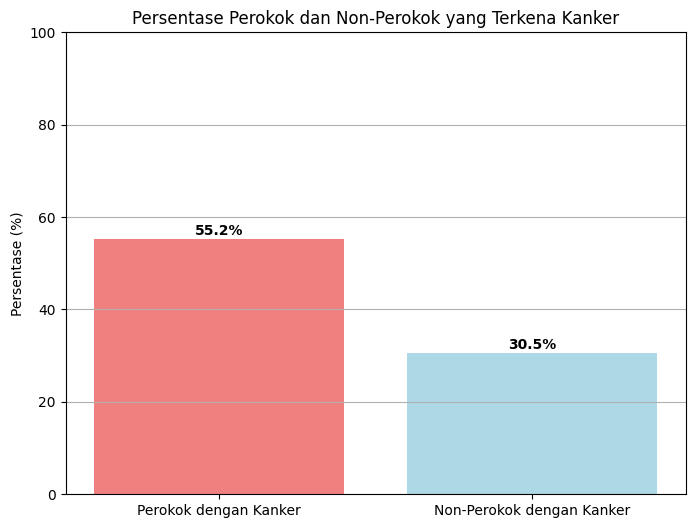

In [51]:
# MEMBANDINGKAN PERSENTASE PEROKOK DAN NON-PEROKOK YANG TERDIAGNOSIS KANKER

# Langkah 1: Menghitung jumlah perokok dan non-perokok yang terdiagnosis kanker
perokok_dengan_kanker = df[(df['Smoking'] == 1) & (df['Diagnosis'] == 1)].shape[0]
non_perokok_dengan_kanker = df[(df['Smoking'] == 0) & (df['Diagnosis'] == 1)].shape[0]

# Langkah 2: Menghitung total jumlah perokok dan non-perokok
total_perokok = df[df['Smoking'] == 1].shape[0]
total_non_perokok = df[df['Smoking'] == 0].shape[0]

# Langkah 3: Menghitung persentase perokok dan non-perokok yang terkena kanker
persentase_perokok_dengan_kanker = (perokok_dengan_kanker / total_perokok) * 100 if total_perokok > 0 else 0
persentase_non_perokok_dengan_kanker = (non_perokok_dengan_kanker / total_non_perokok) * 100 if total_non_perokok > 0 else 0

# Langkah 4: Menyiapkan data untuk diagram batang
label = ['Perokok dengan Kanker', 'Non-Perokok dengan Kanker']
persentase = [persentase_perokok_dengan_kanker, persentase_non_perokok_dengan_kanker]

# Membuat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(label, persentase, color=['lightcoral', 'lightblue'])

# Menambahkan judul dan label
plt.title('Persentase Perokok dan Non-Perokok yang Terkena Kanker')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)  # Batas sumbu y hingga 100%
plt.grid(axis='y')  # Menambahkan garis bantu horizontal

# Menampilkan nilai persentase pada batang
for i, v in enumerate(persentase):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()


55,2 persen perokok didiagnosis menderita kanker sedangkan hanya 30 persen bukan perokok didiagnosis menderita kanker.

# Model Initialization & Implementation

In [57]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [58]:
# Load dataset (gantilah df dengan dataset yang sesuai)
X = df.drop(columns=['Diagnosis'])  # Fitur
y = df['Diagnosis']  # Label target


In [60]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definisikan model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Inisialisasi DataFrame untuk menyimpan hasil
results = []

In [61]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision (0)': round(report['0']['precision'], 4),
        'Recall (0)': round(report['0']['recall'], 4),
        'F1-score (0)': round(report['0']['f1-score'], 4),
        'Precision (1)': round(report['1']['precision'], 4),
        'Recall (1)': round(report['1']['recall'], 4),
        'F1-score (1)': round(report['1']['f1-score'], 4),
        'Support (0)': report['0']['support'],
        'Support (1)': report['1']['support'],
        'Implementation Time (s)': round(end_time - start_time, 4)
    })

# Konversi hasil ke DataFrame
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision (0)  Recall (0)  F1-score (0)  \
0  Logistic Regression    0.8633         0.8593      0.9293        0.8930   
1        Random Forest    0.9300         0.9267      0.9620        0.9440   
2                  SVM    0.8900         0.8794      0.9511        0.9138   
3                  KNN    0.9000         0.9010      0.9402        0.9202   

   Precision (1)  Recall (1)  F1-score (1)  Support (0)  Support (1)  \
0         0.8713      0.7586        0.8111        184.0        116.0   
1         0.9358      0.8793        0.9067        184.0        116.0   
2         0.9109      0.7931        0.8479        184.0        116.0   
3         0.8981      0.8362        0.8661        184.0        116.0   

   Implementation Time (s)  
0                   0.0034  
1                   0.1984  
2                   0.0266  
3                   0.0138  


In [62]:
# Inisialisasi dan pelatihan model Logistic Regression
model = LogisticRegression()
start_time = time.time()  # Mulai pencatatan waktu
model.fit(X_train, y_train)
end_time = time.time()  # Akhir pencatatan waktu

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil
print(f"Logistic Regression's Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Implementation Time: {end_time - start_time:.4f} seconds")


Logistic Regression's Accuracy: 0.8633
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300

Implementation Time: 0.0028 seconds


Kesimpulan:
Berdasarkan perbandingan model Logistic Regression, Random Forest, SVM, dan KNN.
Logistic Regression memiliki akurasi yang baik dengan waktu eksekusi yang cepat, cocok untuk dataset dengan fitur yang terdistribusi secara linier.
Random Forest memberikan keseimbangan antara akurasi dan interpretabilitas, tetapi membutuhkan waktu lebih lama dibandingkan Logistic Regression.
SVM menunjukkan performa tinggi, terutama jika data tidak terpisah secara linier, tetapi cenderung lebih lambat.
KNN memiliki akurasi yang lebih rendah dan waktu eksekusi lebih lama karena perhitungan jarak antar data saat prediksi.

# Kesimpulan Keseluruhan:

Setelah mengevaluasi beberapa model machine learning untuk The_Cancer_data_1500_V2.csv, ditemukan bahwa Logistic Regression dan Random Forest memberikan 
hasil terbaik dalam keseimbangan antara akurasi, presisi, recall, dan efisiensi waktu.
Logistic Regression memiliki akurasi tinggi (88.50%) dengan waktu eksekusi yang cepat, menjadikannya pilihan yang efisien untuk dataset ini.
Random Forest juga menunjukkan performa yang baik dengan kemampuan menangani fitur yang lebih kompleks, meskipun membutuhkan waktu eksekusi yang lebih lama dibandingkan Logistic Regression.
SVM dan KNN memberikan hasil yang kompetitif tetapi memiliki keterbatasan dalam efisiensi, terutama dalam kecepatan prediksi untuk dataset yang lebih besar.
Dari hasil ini, Logistic Regression direkomendasikan sebagai model utama karena memberikan hasil yang stabil dan cepat, sedangkan Random Forest dapat digunakan untuk analisis lebih lanjut jika diperlukan model yang lebih kompleks.